# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```
A set of testing config files were created to test each individual augmentation techniques as given below.

pipeline_new_1.config - Random horizontal flip
pipeline_new_2.config - Random crop image
pipeline_new_3.config - Random contrast adjustment
pipeline_new_4.config - Random RGB to gray
pipeline_new_5.config - Random brightnesss adjustment

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import tensorflow as tf

In [57]:
'''
RGB to gray augmentation

Randomly converts RGB image into grayscale

usage:

data_augmentation_options { random_rgb_to_gray { probability: 0.2 } }
'''
def rgb_to_gray(image):
    converted = tf.image.rgb_to_grayscale(image)
    return converted.numpy()
 
'''
Random crop augmentation

The RandomCrop transform (see also crop()) crops an image at a random location.

usage:

  data_augmentation_options {
    random_crop_image {
      min_object_covered: 0.0
      min_aspect_ratio: 0.75
      max_aspect_ratio: 3.0
      min_area: 0.75
      max_area: 1.0
      overlap_thresh: 0.0
    }
  }
'''
def random_crop(image):
    # dimension for cropping 
    NEW_IMG_HEIGHT = 160
    NEW_IMG_WIDTH = 160
    cropped_image = tf.image.random_crop(image, size=[NEW_IMG_HEIGHT, NEW_IMG_WIDTH, 3])
    return cropped_image.numpy()

'''
Random contrast adjustment
Randomly adjusts the contrast of an image 

usage:

data_augmentation_options { random_adjust_contrast { min_delta: 0.6 max_delta: 1.0 } }
'''
def random_contrast_adjust(image):
    # contrast is randomly adjusted in between 0.6 and 1.0
    converted = tf.image.random_contrast(image, 0.6, 1.0)
    return converted.numpy()

'''
Randomly adjusts the brightness of an image

usage:

data_augmentation_options { random_adjust_brightness { max_delta: 0.2 } }
'''
def random_brightness_adjust(image):
    # brightness adjustment value of 0.2
    converted = tf.image.random_brightness(image, 0.2)
    return converted.numpy()

'''
Random flipping horizontally

The RandomHorizontalFlip transform (see also hflip()) performs horizontal flip of an image, with a given probability.

usage:

  data_augmentation_options {
    random_horizontal_flip {
    }
  }
'''
def random_horizontal_flip(image):
    converted = tf.image.random_flip_up_down(image)
    return converted.numpy()

def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    #image += [0.0, 0.0, 0.0]
    return image

def display_instances(image, bboxes, classes):
    original_image = recenter_image(image)
    # Uncomment each of following autmentation one at a time to see
    # how this particular augmentation technique works visually
    #image = random_crop(original_image)
    #image = rgb_to_gray(original_image)
    #image = random_contrast_adjust(original_image)
    #image = random_brightness_adjust(original_image)
    image = random_horizontal_flip(original_image)
    w, h, _ = original_image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w 
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(original_image.astype(np.uint8))
    ax[1].imshow(image.astype(np.uint8))
    # Draw the bounding boxes for the ground truth object classes
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax[0].add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    # Iterate through all the sample images in the batch
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

pipeline_new_1.config - Random horizontal flip

The RandomHorizontalFlip transform (see also hflip()) performs horizontal flip of an image, with a given probability.

usage:

  data_augmentation_options {
    random_horizontal_flip {
    }
  }

In [58]:
from utils import get_train_input

In [59]:
train_dataset = get_train_input("./experiments/experiment0/pipeline_new_1.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/train/segment-10625026498155904401_200_000_220_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', '/app/project/data/train/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord', '/app/project/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/app/project/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1172406780360799916_1660_000_1680_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord', '/app/project/data/train/segment-11379226

INFO:tensorflow:Reading record datasets for input file: ['/app/project/data/train/segment-10625026498155904401_200_000_220_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', '/app/project/data/train/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord', '/app/project/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/app/project/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1172406780360799916_1660_000_1680_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord', '/app/project/data/train/segme

INFO:tensorflow:Number of filenames to read: 86


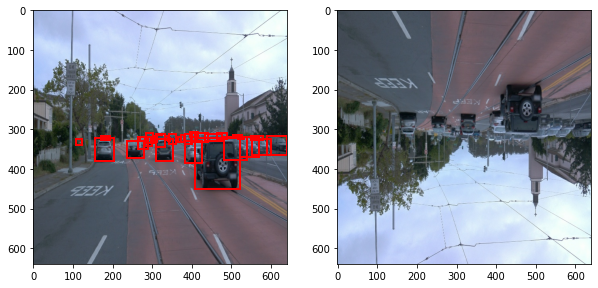

In [60]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

pipeline_new_2.config - Random crop image

The RandomCrop transform (see also crop()) crops an image at a random location.

usage:

  data_augmentation_options {
    random_crop_image {
      min_object_covered: 0.0
      min_aspect_ratio: 0.75
      max_aspect_ratio: 3.0
      min_area: 0.75
      max_area: 1.0
      overlap_thresh: 0.0
    }
  }

In [61]:
from utils import get_train_input
train_dataset = get_train_input("./experiments/experiment0/pipeline_new_2.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/train/segment-10625026498155904401_200_000_220_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', '/app/project/data/train/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord', '/app/project/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/app/project/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1172406780360799916_1660_000_1680_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord', '/app/project/data/train/segment-11379226

INFO:tensorflow:Reading record datasets for input file: ['/app/project/data/train/segment-10625026498155904401_200_000_220_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', '/app/project/data/train/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord', '/app/project/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/app/project/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1172406780360799916_1660_000_1680_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord', '/app/project/data/train/segme

INFO:tensorflow:Number of filenames to read: 86


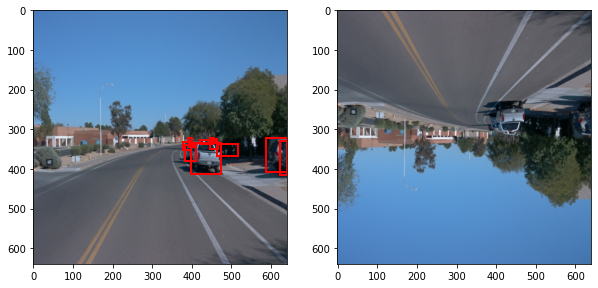

In [62]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)



pipeline_new_3.config - Random contrast adjustment

  data_augmentation_options {
    random_adjust_contrast {
    min_delta: 0.6
    max_delta: 1.0
    }
  }

In [41]:
train_dataset = get_train_input("./experiments/experiment0/pipeline_new_3.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/train/segment-10625026498155904401_200_000_220_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', '/app/project/data/train/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord', '/app/project/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/app/project/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1172406780360799916_1660_000_1680_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord', '/app/project/data/train/segment-11379226

INFO:tensorflow:Reading record datasets for input file: ['/app/project/data/train/segment-10625026498155904401_200_000_220_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', '/app/project/data/train/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord', '/app/project/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/app/project/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1172406780360799916_1660_000_1680_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord', '/app/project/data/train/segme

INFO:tensorflow:Number of filenames to read: 86


In [ ]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

pipeline_new_4.config - Random RGB to gray

  data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
  }

In [204]:
train_dataset = get_train_input("./experiments/experiment0/pipeline_new_4.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/train/segment-10625026498155904401_200_000_220_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', '/app/project/data/train/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord', '/app/project/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/app/project/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1172406780360799916_1660_000_1680_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord', '/app/project/data/train/segment-11379226

INFO:tensorflow:Reading record datasets for input file: ['/app/project/data/train/segment-10625026498155904401_200_000_220_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', '/app/project/data/train/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord', '/app/project/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/app/project/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1172406780360799916_1660_000_1680_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord', '/app/project/data/train/segme

INFO:tensorflow:Number of filenames to read: 86


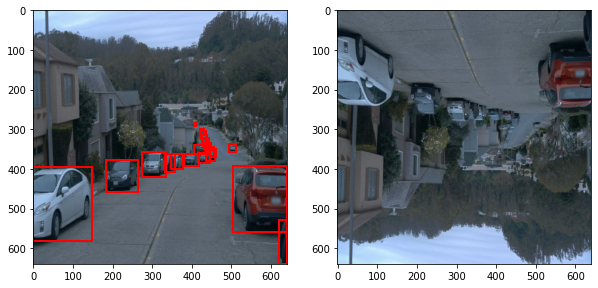

In [205]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

pipeline_new_5.config - Random brightnesss adjustment

  data_augmentation_options {
    random_adjust_brightness {
    max_delta: 0.2
    }
  }

1


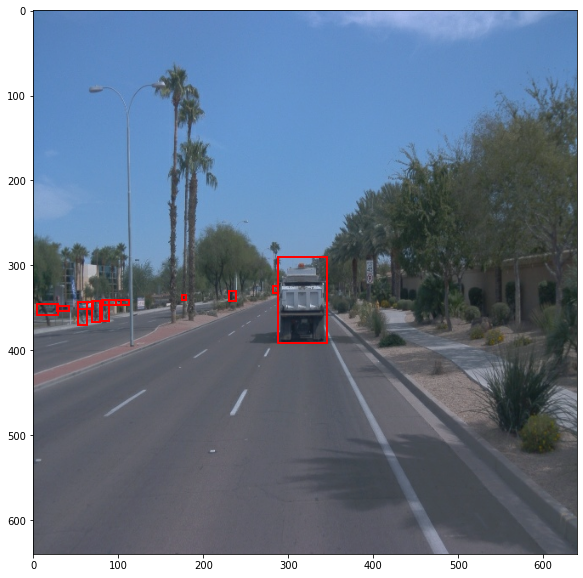

In [31]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)